In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [305]:
loan= pd.read_csv('loan-train.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Preprocessing
- Replace Null Values
- Drop Loan_ID column
- Perform Label Encoding - In order to convert character variables, we have to enncode using Label Encoder

In [306]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [307]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [308]:
# in Categorical variables, replace the nulls with mode value
for col in categorical_columns:
    loan[col].fillna(loan[col].mode()[0],inplace=True)

# in Nnumeric variables, replcase nulls with mean values of each variable
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())



In [309]:
loan.drop('Loan_ID', axis = 1, inplace=True)

In [310]:
# Assigning numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
loan['Gender'] = labelencoder.fit_transform(loan['Gender'])
loan['Married'] = labelencoder.fit_transform(loan['Married'])
loan['Dependents'] = labelencoder.fit_transform(loan['Dependents'])
loan['Education'] = labelencoder.fit_transform(loan['Education'])
loan['Self_Employed'] = labelencoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = labelencoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = labelencoder.fit_transform(loan['Loan_Status'])

loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


## Decision Tree with outliers and skewness

In [283]:
from sklearn .model_selection import train_test_split
X=loan[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 11), (185, 11))

In [284]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)   # max depth for decition tree is level 3

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [285]:
Confusion_matrix_Tree = metrics.confusion_matrix(y_test, y_pred_tree) 
print(Confusion_matrix_Tree)
accuracy = metrics.accuracy_score(y_test, y_pred_tree) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred_tree) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred_tree) 
print("Recall score:",recall)

[[ 21  30]
 [  2 132]]
Accuracy score: 0.827027027027027
Precision score: 0.8148148148148148
Recall score: 0.9850746268656716


# Running Decision Tree model without outliers and remove skewness (noise) in columns (ApplicantIncome, CoApplicantIncome and Loan_Amount), we perform binning
Since there is noise the data and the data is skewed to the right, we perform below two corrective actions:
1. Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data
2. Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

## Method1: Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data

In [297]:
#Remove outlier customers with outlying ApplicantIncome (above $30000 i.e. 7 customers)
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].count())
#plt.hist(loan['ApplicantIncome'][loan['ApplicantIncome']<30000], bins=10)

#Remove outlier customers with outlying CoaaplicantIncome (above $15000 i.e. 4 customers)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].count())
#plt.hist(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000], bins=10)

#Remove outlier customers with outlying loan amount (above $500 i.e. 5 customers)
print(loan['LoanAmount'][loan['LoanAmount']>500].count())
#plt.hist(loan['LoanAmount'][loan['LoanAmount']<500], bins=10)

7
4
5


In [298]:
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].index)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].index)
print(loan['LoanAmount'][loan['LoanAmount']>500].index)

Int64Index([155, 171, 183, 185, 333, 409, 443], dtype='int64')
Int64Index([402, 417, 581, 600], dtype='int64')
Int64Index([130, 155, 171, 369, 561], dtype='int64')


In [299]:
#Create dataset without outliers - drop rows 
loan_noOutliers = loan.copy()
loan_noOutliers.drop(loan_noOutliers['ApplicantIncome'][loan_noOutliers['ApplicantIncome']>30000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['CoapplicantIncome'][loan_noOutliers['CoapplicantIncome']>15000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['LoanAmount'][loan_noOutliers['LoanAmount']>500].index, inplace=True)

In [300]:
loan_noOutliers.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
##Decision Tree without outliers and skewness-droppinng outliers (method1)

In [301]:
#Decisionn Tree - Without outliers- method2: using log function
X=loan_noOutliers[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan_noOutliers[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((420, 11), (180, 11))

In [302]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [303]:
Confusion_matrix_Tree = metrics.confusion_matrix(y_test, y_pred_tree) 
print(Confusion_matrix_Tree)
accuracy = metrics.accuracy_score(y_test, y_pred_tree) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred_tree) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred_tree) 
print("Recall score:",recall)

[[ 25  34]
 [  5 116]]
Accuracy score: 0.7833333333333333
Precision score: 0.7733333333333333
Recall score: 0.9586776859504132


## Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

In [311]:
#Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

loan['TotalApplicantIncome']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['TotalApplicantIncome']

# applying log function on TotalApplicantIncome & LoanAmount_log
loan['TotalApplicantIncome_log']=np.log(loan['TotalApplicantIncome'])    
loan['LoanAmount_log']=np.log(loan['LoanAmount'])

In [312]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,TotalApplicantIncome_log,LoanAmount_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,4.986426
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568,4.852030
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,4.189655
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323,4.787492
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,4.948760


<AxesSubplot:>

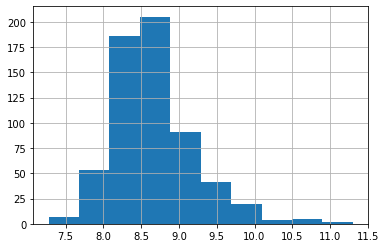

In [313]:
loan['TotalApplicantIncome_log'].hist(bins=10) 

<AxesSubplot:>

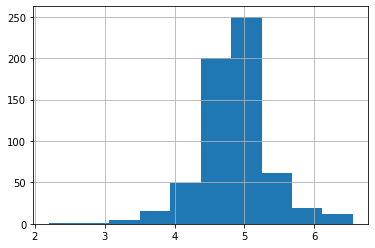

In [314]:
loan['LoanAmount_log'].hist(bins=10)

## Decision Tree without outliers and skewness-log function normalization (method 2)

In [315]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalApplicantIncome', 'TotalApplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [316]:
#Logistic Regression- Without outliers- method2: using log function
X=loan[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','TotalApplicantIncome_log', 'LoanAmount_log','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 10), (185, 10))

In [317]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [318]:
Confusion_matrix_Tree = metrics.confusion_matrix(y_test, y_pred_tree) 
print(Confusion_matrix_Tree)
accuracy = metrics.accuracy_score(y_test, y_pred_tree) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred_tree) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred_tree) 
print("Recall score:",recall)

[[ 21  30]
 [  5 129]]
Accuracy score: 0.8108108108108109
Precision score: 0.8113207547169812
Recall score: 0.9626865671641791


In [275]:
#!pip install graphviz
#!pip install pydotplus

import matplotlib.pyplot as plt
from sklearn import tree

features=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
prediction=['Loan_Statues']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,50), dpi=300,)
sub1=tree.plot_tree(clf, fontsize=14, class_names=['Yes','No'], feature_names=features)